In [ ]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [13]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end;

In [30]:
function output(idx_I0, idx_U0, I0, U0, u0)
    println("index I0: $idx_I0; I0: $I0");flush(stdout)
    println("index U0: $idx_U0; U0: $U0");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function separate()
    println();flush(stdout)
    println("---------");flush(stdout)
end;

In [72]:
t = 100.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [88]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  U0 = 0.3;  constΔU0 = 0.305; I0 = -1.45;

LoadError: cannot declare α constant; it already has a value

In [67]:
u0 = SA[17.6055, 0.6181, 0.429232]

3-element SVector{3, Float64} with indices SOneTo(3):
 17.6055
  0.6181
  0.429232

In [89]:
I0range = range( -1.45, -1.87036, length = 50 )
U0range = range( 0.3,  0.5, length = 50)
Λs = zeros(length(I0range), length(U0range), 3)
u0s = zeros(length(I0range), length(U0range), 3);

In [95]:
function check_FP(tr_lc)
    if abs.(tr_lc[end] - tr_lc[30000]) <= [1e-6, 1e-6, 1e-6]
        return true
    else
        return false
    end
end

check_FP (generic function with 1 method)

In [97]:
# Предварительная протяжка
for (idx_U0, U0_) in enumerate(U0range)
    
    if idx_U0 == 1
            global u0loc = u0
    end
    
    output(1, idx_U0, I0range[1], U0_, u0loc)
    
    # Инициализация
    p_loc = SA[α, τ, τD, τy, J, xthr, ythr, U0_, ΔU0, β, I0range[1]]
    ds_loc = ContinuousDynamicalSystem(TM, u0loc, p_loc)

    # Считаемся по времени tt + t, берем последнюю точку, принимаем её за начальную
    tr_loc = trajectory(ds_loc, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
    u0loc = tr_loc[end]
    ds_loc = ContinuousDynamicalSystem(TM, u0loc, p_loc)
    
    fp = check_FP(tr_loc)
    if fp == true
        Λs[1, idx_U0, :] = [NaN, NaN, NaN]
    else
        Λs_lc = lyapunovspectrum(ds_loc, t; diffeq = integ_set)
        Λs[1, idx_U0, :] = Λs_lc
    end
    println("Λs: $(Λs[1, idx_U0, :])");flush(stdout)
    u0s[1, idx_U0, :] = u0loc
    println("last point: $u0loc");flush(stdout)
    separate()
end

index I0: 1; I0: -1.45
index U0: 1; U0: 0.3
u0: [17.6055, 0.6181, 0.429232]
Λs: [0.052614433569584805, -1.1573946228003433, -3.9159859966008224]
last point: [12.883840673808114, 0.605036907845638, 0.42570696362511096]

---------
index I0: 1; I0: -1.45
index U0: 2; U0: 0.3040816326530612
u0: [12.883840673808114, 0.605036907845638, 0.42570696362511096]
Λs: [0.04974219235373028, -0.9401305194503533, -4.1853883634423825]
last point: [4.305185219683925, 0.7833296012443556, 0.4185270216039575]

---------
index I0: 1; I0: -1.45
index U0: 3; U0: 0.3081632653061224
u0: [4.305185219683925, 0.7833296012443556, 0.4185270216039575]
Λs: [0.044235176664398745, -0.7315234552756649, -4.441334534525105]
last point: [18.692603910507536, 0.6065814898008677, 0.42944244598671394]

---------
index I0: 1; I0: -1.45
index U0: 4; U0: 0.3122448979591837
u0: [18.692603910507536, 0.6065814898008677, 0.42944244598671394]
Λs: [0.03582282559748521, -0.6200267343544672, -4.600897098130325]
last point: [3.9084781989734


---------
index I0: 1; I0: -1.45
index U0: 31; U0: 0.42244897959183675
u0: [19.790876557236142, 0.664604433171031, 0.4031288233347734]
Λs: [0.05015448023801992, -2.8841137682184677, -2.9661606032400005]
last point: [9.826784619842162, 0.7898633443858497, 0.4015042370166399]

---------
index I0: 1; I0: -1.45
index U0: 32; U0: 0.42653061224489797
u0: [9.826784619842162, 0.7898633443858497, 0.4015042370166399]
Λs: [0.03757539445479906, -2.884841755066932, -2.932199369752416]
last point: [8.385301485344236, 0.6437062838083928, 0.38696935481168204]

---------
index I0: 1; I0: -1.45
index U0: 33; U0: 0.4306122448979592
u0: [8.385301485344236, 0.6437062838083928, 0.38696935481168204]
Λs: [0.0033650928263492495, -2.8420075901030213, -2.935610685876841]
last point: [17.792472149926763, 0.5667153571691311, 0.39352906902600204]

---------
index I0: 1; I0: -1.45
index U0: 34; U0: 0.4346938775510204
u0: [17.792472149926763, 0.5667153571691311, 0.39352906902600204]
Λs: [-0.007964564707277657, -2.84

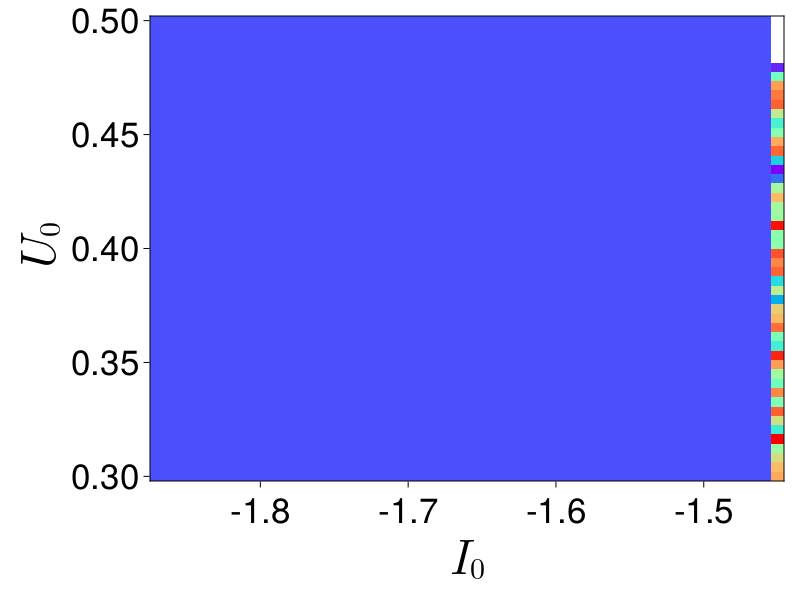

In [98]:
f = Figure()
ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = 35, yticklabelsize = 35,
            xgridvisible  = false, ygridvisible = false)
hm1 = heatmap!(ax, I0range, U0range, Λs[:, :, 1], colormap = :rainbow1)
f